# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
#Import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from PIL import Image
from collections import Counter
from tqdm import tqdm
from sklearn.model_selection import train_test_split


import tensorflow as tf

In [2]:
# Check if local gpu is being used
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create a dataframe which summarizes the image, path & captions as a dataframe

4.Create a list which contains all the captions & path

5.Visualise the top 30 occuring words in the captions



In [4]:
INPUT_PATH = "D:/Work/Capstone/archive/"
images = INPUT_PATH+'Images'
text_file = INPUT_PATH+'captions.txt'
output_image_path = "../working/Image/"

In [5]:
#Import the dataset and read the image into a seperate variable

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


In [6]:
all_imgs[0]

'D:/Work/Capstone/archive/Images\\1000268201_693b08cb0e.jpg'

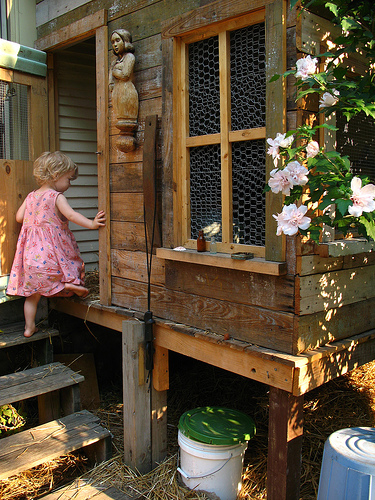

In [7]:
#Visualise both the images & text present in the dataset

Image.open(all_imgs[0])

In [8]:
#Import the dataset and read the text file into a seperate variable

def load_doc(filename):
    
    #your code here
    with open(filename) as f:
        text = f.read()
    
    return text

doc = load_doc(text_file)
print(doc[:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


In [9]:
captions = doc.splitlines()
captions[:4]

['image,caption',
 '1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .']

Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [10]:
'''
Function to return image id, imager path and captions
'''
def get_imageid_annotation_path(text):
    img_ids = []
    values = []
    img_paths = []
    text = text.splitlines()[1:] # skipping the first row
    for line in text:
        com_idx = line.index(",")
        im_id,im_cap = line[:com_idx],line[com_idx+1:]
        img_ids.append(im_id) #store all the image id here
        values.append(im_cap) #store all the captions here
        img_paths.append(images+'\\'+im_id) #store all the image path here
    return img_ids,img_paths, values

all_img_id, all_img_vector, annotations = get_imageid_annotation_path(doc)

In [11]:
# all_img_id = [i.split(',')[0] for i in captions[1:]] #store all the image id here
# all_img_vector = [images+'\\'+i.split(',')[0] for i in captions[1:]] #store all the image path here
# annotations = [i.split(',')[1] for i in captions[1:]] #store all the captions here

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df.head()

ID  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                                Path  \
0  D:/Work/Capstone/archive/Images\1000268201_693...   
1  D:/Work/Capstone/archive/Images\1000268201_693...   
2  D:/Work/Capstone/archive/Images\1000268201_693...   
3  D:/Work/Capstone/archive/Images\1000268201_693...   
4  D:/Work/Capstone/archive/Images\1000268201_693...   

                                            Captions  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...

In [12]:
list(df.Path.sample(4))

['D:/Work/Capstone/archive/Images\\3139118874_599b30b116.jpg',
 'D:/Work/Capstone/archive/Images\\447722389_4b51b7e13d.jpg',
 'D:/Work/Capstone/archive/Images\\509778093_21236bb64d.jpg',
 'D:/Work/Capstone/archive/Images\\1309330801_aeeb23f1ee.jpg']

In [13]:
'''
Function to take list of path, captions and plot image with is corresponding captions
'''

def plot_image_captions(Pathlist,captionsList,fig,count=2,npix=299,nimg=2):
        image_load = load_img(Path,target_size=(npix,npix,3))
        ax = fig.add_subplot(nimg,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        
        count +=1
        ax = fig.add_subplot(nimg,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,len(captions))
        for i, caption in enumerate(captions):
            ax.text(0,i,caption,fontsize=20)

In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import plot_model

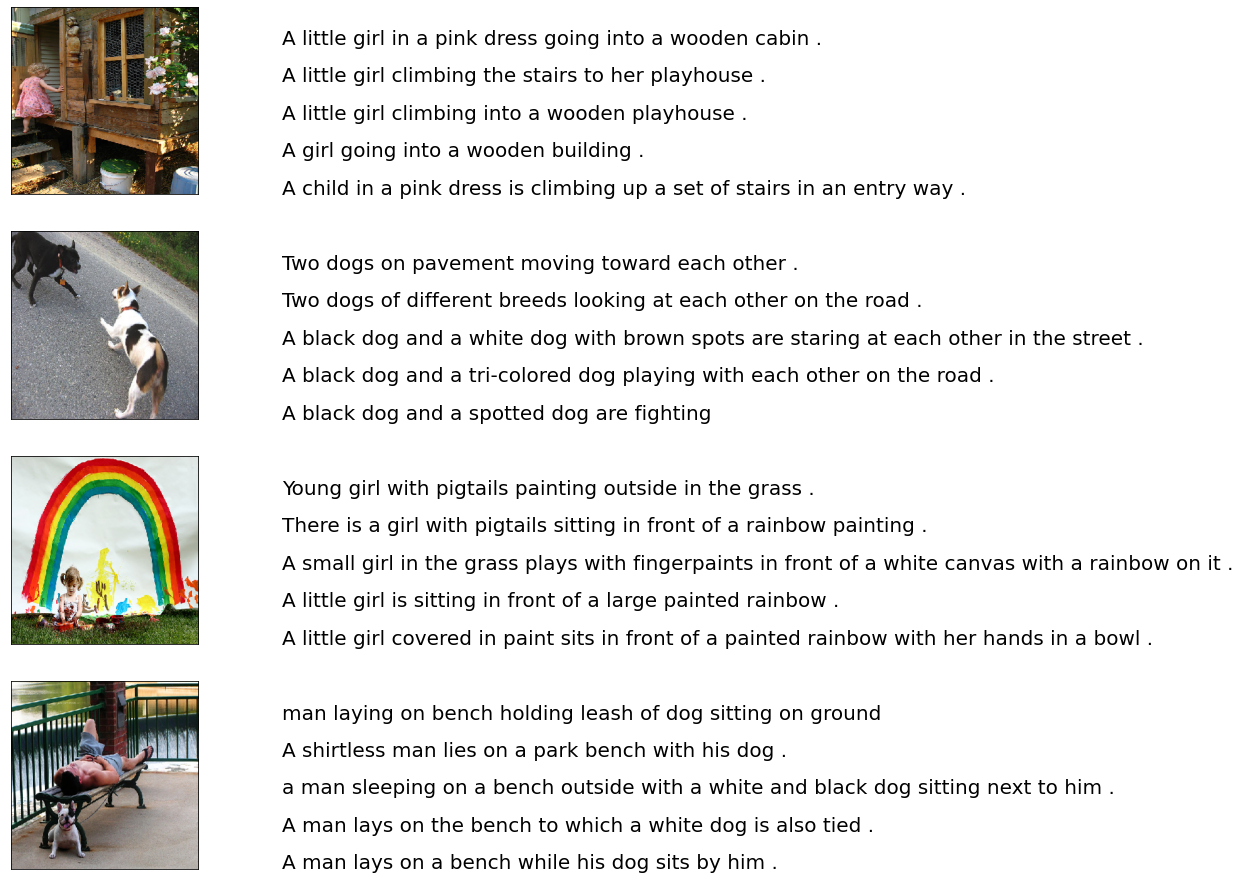

In [15]:
# Images 
fig = plt.figure(figsize=(10,20))
count = 1
    
for Path in df[:20].Path.unique():
    captions = list(df["Captions"].loc[df.Path== Path].values)
    plot_image_captions(Path,captions,fig,count,299,5)
    count +=2
plt.show()

In [16]:
#Create a list which contains all the captions
annotations = df.Captions.apply(lambda x: '<start>' + ' ' + x + ' ' '<end>') #write your code here

#add the <start> & <end> token to all those captions as well

#Create a list which contains all the path to the images
all_img_path = df.Path.tolist()#write your code here

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>


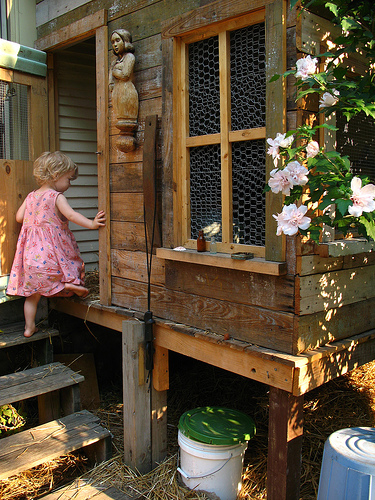

In [17]:
print(annotations[0])
Image.open(all_img_path[0])

In [18]:
#Create the vocabulary & the counter for the captions
vocabulary = []

for i in df["Captions"]:
    vocabulary.extend(i.split(" "))

val_count=Counter(vocabulary).most_common()


In [19]:
#Visualise the top 30 occuring words in the captions

#write your code here
val_count[:30]

[('a', 40271),
 ('.', 34212),
 ('A', 21481),
 ('in', 18961),
 ('the', 15328),
 ('on', 10729),
 ('is', 9345),
 ('and', 8850),
 ('dog', 7982),
 ('with', 7760),
 ('man', 6828),
 ('of', 6712),
 ('Two', 3962),
 ('white', 3875),
 ('black', 3696),
 ('are', 3503),
 ('boy', 3442),
 ('woman', 3227),
 ('girl', 3217),
 (',', 3210),
 ('to', 3173),
 ('wearing', 3061),
 ('The', 2920),
 ('at', 2904),
 ('water', 2774),
 ('red', 2660),
 ('brown', 2475),
 ('people', 2442),
 ('young', 2431),
 ('."', 2365)]

## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [20]:
# create the tokenizer

# Choose the top 5000 words from the vocabulary
# Basic text pre-processing handled by keras
top_k = 5000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ',
                                                 lower=True)
tokenizer.fit_on_texts(annotations)

In [21]:
# Create word-to-index and index-to-word mappings.

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [22]:
# Create the tokenized vectors
train_seqs = tokenizer.texts_to_sequences(annotations) #Transforms text to a sequence of integers. List of captions as input
train_seqs[:5]

[[3, 2, 44, 5, 2, 91, 173, 8, 120, 52, 2, 394, 13, 395, 5, 29, 1, 671, 4],
 [3, 2, 20, 317, 65, 2, 197, 118, 4],
 [3, 2, 41, 20, 120, 65, 2, 197, 2438, 4],
 [3, 2, 41, 20, 120, 6, 395, 21, 61, 2438, 4],
 [3, 2, 41, 20, 5, 2, 91, 173, 317, 65, 2, 197, 2982, 4]]

In [23]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing

#your code here
sorted(tokenizer.word_counts.items(), key = lambda x:x[1], reverse = True)[:30]

[('a', 62992),
 ('<start>', 40455),
 ('<end>', 40455),
 ('in', 18986),
 ('the', 18419),
 ('on', 10745),
 ('is', 9345),
 ('and', 8862),
 ('dog', 8138),
 ('with', 7765),
 ('man', 7274),
 ('of', 6723),
 ('two', 5642),
 ('white', 3959),
 ('black', 3848),
 ('boy', 3581),
 ('are', 3504),
 ('woman', 3402),
 ('girl', 3328),
 ('to', 3176),
 ('wearing', 3062),
 ('at', 2915),
 ('people', 2883),
 ('water', 2790),
 ('red', 2691),
 ('young', 2630),
 ('brown', 2578),
 ('an', 2432),
 ('his', 2357),
 ('blue', 2279)]

In [24]:
# Pad each vector to the max_length of the captions

# If you do not provide a max_length value, pad_sequences calculates it automatically
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 39)


In [25]:
# Find the maximum length of any caption in our dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)


# Calculates the max_length, which is used to store the attention weights
max_length = calc_max_length(train_seqs)

In [26]:
max_length

39

## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

### FAQs on how to resize the images::
* Since you have a list which contains all the image path, you need to first convert them to a dataset using <i>tf.data.Dataset.from_tensor_slices</i>. Once you have created a dataset consisting of image paths, you need to apply a function to the dataset which will apply the necessary preprocessing to each image. 
* This function should resize them and also should do the necessary preprocessing that it is in correct format for InceptionV3.


In [27]:
# Write your code here for creating the function. This function should return images & their path
# Function to preprocess image to be passed as an input to InceptionNet 

def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Resized Shape - (299, 299, 3)


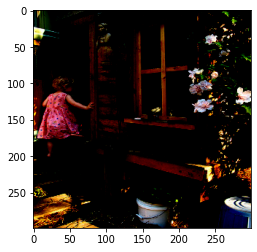

In [28]:
print("Resized Shape -", load_image(all_img_path[0])[0].shape)
plt.imshow(load_image(all_img_vector[0])[0])

In [29]:
print(all_img_id[1],all_img_vector[1],annotations[1])

1000268201_693b08cb0e.jpg D:/Work/Capstone/archive/Images\1000268201_693b08cb0e.jpg <start> A girl going into a wooden building . <end>


In [30]:
# Create the dataset consisting of image paths


# Get unique images
encode_train = sorted(set(all_img_vector))

# Feel free to change batch_size according to your system configuration
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)

# preprocess images using load_image
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.AUTOTUNE).batch(32)

In [31]:
image_dataset

<BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.string)>

## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [32]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input # get the input of the image_model
hidden_layer = image_model.layers[-1].output # get the output of the image_model

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)#build the final model using both input & output layer

In [33]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [34]:
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
# write the code to apply the feature_extraction model to your earlier created dataset which contained images & their respective paths
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)

for img, path in tqdm(image_dataset):
    batch_features = image_features_extract_model(img)
    batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        np.save(path_of_feature, bf.numpy())

# Create Train Test Split

### FAQs on how to store the features:
* You can store the features using a dictionary with the path as the key and values as the feature extracted by the inception net v3 model OR
* You can store using numpy(np.save) to store the resulting vector.

## Dataset creation
1.Apply train_test_split on both image path & captions to create the train & test list. Create the train-test spliit using 80-20 ratio & random state = 42

2.Create a function which maps the image path to their feature. 

3.Create a builder function to create train & test dataset & apply the function created earlier to transform the dataset

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 8*8, 2048)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [34]:
max_length

39

In [35]:
#write your code here

image_train, image_test, cap_train, cap_test = train_test_split(all_img_vector, cap_vector, test_size = 0.2, random_state = 42)

In [36]:
print("Training data for images: " + str(len(image_train)))
print("Testing data for images: " + str(len(image_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [37]:
sample_img_batch, sample_cap_batch = next(iter(image_dataset))
print(sample_img_batch.shape) #(batch_size, 299, 299, 3)
print(sample_cap_batch.shape) #(batch_size, max_len)

(32, 299, 299, 3)
(32,)


In [38]:
cap_train.shape

(32364, 39)

In [39]:
# Create a function which maps the image path to their feature. 
# This function will take the image_path & caption and return it's feature & respective caption.

# Load the numpy files
def map_function(img_name, cap):
    img_tensor = np.load(img_name.decode('utf-8')+'.npy')
    return img_tensor, cap

### FAQs on how to load the features:
* You can load the features using the dictionary created earlier OR
* You can store using numpy(np.load) to load the feature vector.

In [40]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

def gen_dataset(images_data, captions_data, BATCH_SIZE =32, BUFFER_SIZE = 1000):
    
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))
    dataset = dataset.shuffle(BUFFER_SIZE)

    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_function, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)


    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset



In [41]:
train_dataset=gen_dataset(image_train,cap_train)
test_dataset=gen_dataset(image_test,cap_test)

In [42]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(32, 64, 2048)
(32, 39)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [43]:
BATCH_SIZE = 32
embedding_dim = 256 
units = 512
vocab_size = top_k + 1 #top 5,000 words +1
train_num_steps = len(image_train) // BATCH_SIZE #len(total train images) // BATCH_SIZE
test_num_steps =  len(image_test) // BATCH_SIZE #len(total test images) // BATCH_SIZE

### Encoder

In [44]:
class Encoder(tf.keras.Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        # The encoder passes the features into dense layer
        self.dense = tf.keras.layers.Dense(embed_dim)  #build your Dense layer with relu activation
        
    def call(self, features):
        # extract the features from the image shape: (batch, 8*8, embed_dim)
        
        features =  self.dense(features) 
        features = tf.nn.relu(features) 
        
        return features

In [45]:
encoder=Encoder(embedding_dim)

### Attention model

In [46]:
class Attention_model(tf.keras.Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1) #build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden, 1) # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis)) # build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights =  tf.keras.activations.softmax(self.V(score), axis=1) # extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector = attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis = 1) # reduce the shape to (batch_size, embedding_dim)
        

        return context_vector, attention_weights

### Decoder

In [47]:
class Decoder(tf.keras.Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim, mask_zero =  False) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        self.dropout = tf.keras.layers.Dropout(0.5)
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed =  self.dropout(self.embed(x)) # embed your input to shape: (batch_size, 1, embedding_dim)
        mask = self.embed.compute_mask(x)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed, mask = mask) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [48]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [49]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (32, 64, 256)
Predcitions shape from Decoder: (32, 5001)
Attention weights shape from Decoder: (32, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [50]:
optimizer = tf.keras.optimizers.Adam() #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none') #define your loss object

In [51]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [52]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [53]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
    
    # restoring the latest checkpoint in checkpoint_path
    ckpt.restore(ckpt_manager.latest_checkpoint)

In [54]:
start_epoch

0

In [55]:
ckpt

* While creating the training step for your model, you will apply Teacher forcing.
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

## Training

- Load features stored in the respective .npy files and then pass those features through the encoder.
- The encoder output, hidden state and the decoder input (which is the start token) is passed to the decoder.
- The decoder returns the predictions and the decoder hidden state.
- The decoder hidden state is then passed back into the model and the predictions are used to calculate the loss.
- Teacher forcing is where the target is passed as the next input to the decoder, use this while model training.
- Finally, calculate the gradients and apply it to the optimizer and backpropagate.

In [56]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    
    # init the hidden state for each batch since captions are not related from image to image
    hidden = decoder.init_state(batch_size=target.shape[0])
    
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        
        # Pass extracted features to encoder (.npy) - returned from map_func()
        features = encoder(img_tensor)
        
        for i in range(1, target.shape[1]):
            # Pass feature through decoder - reutrns pred and hidden state
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            
            loss += loss_function(target[:, i], predictions)
            
            # using teacher forcing - target passed as next input to decoder
            dec_input = tf.expand_dims(target[:, i], 1)
            
        avg_loss = (loss/int(target.shape[1]))
        
        trainable_variables = encoder.trainable_variables + decoder.trainable_variables
        
        gradients = tape.gradient(loss, trainable_variables)
        
        optimizer.apply_gradients(zip(gradients, trainable_variables))
        
    return loss, avg_loss

* While creating the test step for your model, you will pass your previous prediciton as the next input to the decoder.

In [57]:
@tf.function
def test_step(img_tensor, target):
    loss = 0

    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    features = encoder(img_tensor)
    
    for i in range(1, target.shape[1]):
          # passing the features through the decoder
            predictions, hidden, _ = decoder(dec_input, features, hidden)

            loss += loss_function(target[:, i], predictions)
            predicted_id = tf.argmax(predictions[0])
            dec_input = tf.expand_dims([predicted_id] * target.shape[0] , 1)
   
    avg_loss = (loss / int(target.shape[1]))
        
    return loss, avg_loss

In [61]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
        
    avg_test_loss=total_loss/test_num_steps
    return avg_test_loss

In [62]:
import time

In [63]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

For epoch: 1, the train loss is 0.808, & test loss is 1.977
Time taken for 1 epoch 163.63391089439392 sec

Test loss has been reduced from 100.000 to 1.977


  7%|█████▍                                                                            | 1/15 [02:44<38:22, 164.48s/it]

For epoch: 2, the train loss is 0.757, & test loss is 1.972
Time taken for 1 epoch 179.08528566360474 sec

Test loss has been reduced from 1.977 to 1.972


 20%|████████████████▍                                                                 | 3/15 [08:07<31:57, 159.79s/it]

For epoch: 3, the train loss is 0.711, & test loss is 2.007
Time taken for 1 epoch 143.4048707485199 sec



 27%|█████████████████████▊                                                            | 4/15 [10:14<26:52, 146.58s/it]

For epoch: 4, the train loss is 0.669, & test loss is 2.058
Time taken for 1 epoch 126.32775044441223 sec



 33%|███████████████████████████▎                                                      | 5/15 [12:23<23:24, 140.44s/it]

For epoch: 5, the train loss is 0.629, & test loss is 2.152
Time taken for 1 epoch 129.55523777008057 sec



 40%|████████████████████████████████▊                                                 | 6/15 [14:38<20:46, 138.49s/it]

For epoch: 6, the train loss is 0.594, & test loss is 2.191
Time taken for 1 epoch 134.70324039459229 sec



 47%|██████████████████████████████████████▎                                           | 7/15 [16:43<17:53, 134.14s/it]

For epoch: 7, the train loss is 0.559, & test loss is 2.251
Time taken for 1 epoch 125.18981409072876 sec



 53%|███████████████████████████████████████████▋                                      | 8/15 [18:46<15:14, 130.64s/it]

For epoch: 8, the train loss is 0.529, & test loss is 2.320
Time taken for 1 epoch 123.1509153842926 sec



 60%|█████████████████████████████████████████████████▏                                | 9/15 [20:49<12:49, 128.33s/it]

For epoch: 9, the train loss is 0.500, & test loss is 2.395
Time taken for 1 epoch 123.24545288085938 sec



 67%|██████████████████████████████████████████████████████                           | 10/15 [22:53<10:34, 126.89s/it]

For epoch: 10, the train loss is 0.474, & test loss is 2.480
Time taken for 1 epoch 123.66574549674988 sec



 73%|███████████████████████████████████████████████████████████▍                     | 11/15 [24:57<08:24, 126.02s/it]

For epoch: 11, the train loss is 0.451, & test loss is 2.572
Time taken for 1 epoch 124.04239988327026 sec



 80%|████████████████████████████████████████████████████████████████▊                | 12/15 [27:01<06:15, 125.25s/it]

For epoch: 12, the train loss is 0.430, & test loss is 2.584
Time taken for 1 epoch 123.47487735748291 sec



 87%|██████████████████████████████████████████████████████████████████████▏          | 13/15 [29:05<04:09, 125.00s/it]

For epoch: 13, the train loss is 0.410, & test loss is 2.697
Time taken for 1 epoch 124.42120122909546 sec



 93%|███████████████████████████████████████████████████████████████████████████▌     | 14/15 [31:12<02:05, 125.60s/it]

For epoch: 14, the train loss is 0.392, & test loss is 2.744
Time taken for 1 epoch 127.00501585006714 sec



100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [33:18<00:00, 133.22s/it]

For epoch: 15, the train loss is 0.376, & test loss is 2.845
Time taken for 1 epoch 125.72372364997864 sec



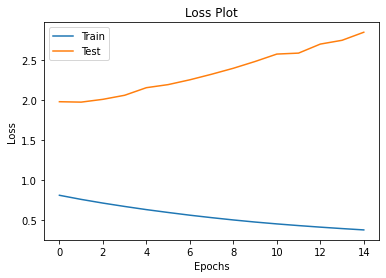

In [64]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend(["Train", "Test"], loc = "best")
plt.show()

#### NOTE: 
* Since there is a difference between the train & test steps ( Presence of teacher forcing), you may observe that the train loss is decreasing while your test loss is not. 
* This doesn't mean that the model is overfitting, as we can't compare the train & test results here, as both approach is different.
* Also, if you want to achieve better results you can run it more epochs, but the intent of this capstone is to give you an idea on how to integrate attention mechanism with E-D architecture for images. The intent is not to create the state of art model. 

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [65]:
def evaluate(image):

    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val) # extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() #extract the predicted id(embedded value) which carries the max value
        result.append(tokenizer.index_word[predicted_id])
        
        #map the id to the word from tokenizer and append the value to the result list
        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

### Beam Search(optional)

In [66]:
def beam_evaluate(image, beam_index = 3):

    start = [tokenizer.word_index['<start>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length:
        i=0
        temp = []
        for s in result:
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            i=i+1
            word_preds = np.argsort(predictions[0])[-beam_index:]
          
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
            
                prob += np.log(predictions[0][w])
                    
                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]
        
        
        predicted_id = result[-1]
        pred_list = predicted_id[0]
        
        prd_id = pred_list[-1] 
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)  
        else:
            break
    
    
    result2 = result[-1][0]
    
    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
            
        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
    return final_caption

In [67]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [70]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction

In [71]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [72]:
features_shape = 2048
attention_features_shape = 64

C:\Users\angad\anaconda3\envs\tflow\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\angad\anaconda3\envs\tflow\lib\site-packages\nltk\translate\bleu_score.py:516: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BELU score: 5.959284093412939e-153
Real Caption      : a man in a hat with long sleeves and long pants stands overlooking a city
Prediction Caption: a man standing in front of a cliff overlooking a town



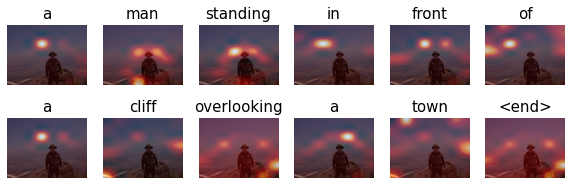

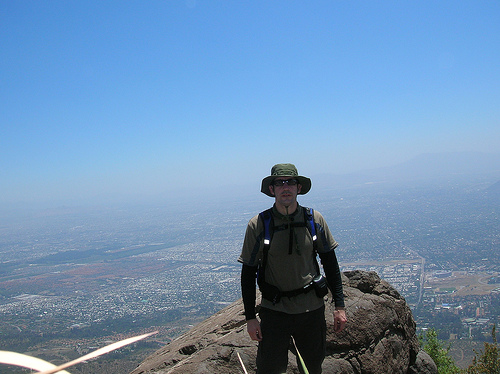

In [93]:
rid = np.random.randint(0, len(image_test))
test_image = image_test[rid]
# test_image = './images/413231421_43833a11f5.jpg'
# real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)
real_caption=filt_text(real_caption)      
pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25))
print(f"BELU score: {score*100}")

print ('Real Caption      :', real_caption)
print ('Prediction Caption:', pred_caption)
print ('')
plot_attmap(result, attention_plot, test_image)

Image.open(test_image)

In [94]:
rid

7414

In [95]:
image_test[rid]

'D:/Work/Capstone/archive/Images\\2089555297_95cf001fa7.jpg'

In [96]:
captions=beam_evaluate(test_image)
print(captions)

a man wearing hand


In [97]:
print ('Real Caption      :', real_caption)
print ('Prediction Caption:', pred_caption)

score1 = sentence_bleu(reference, candidate, weights=(1,0,0,0))
score2 = sentence_bleu(reference, candidate, weights=(0,1,0,0))
score3 = sentence_bleu(reference, candidate, weights=(0,0,1,0))
score4 = sentence_bleu(reference, candidate, weights=(0,0,0,1))

print("\nBELU score: ")
print(f"Individual 1-gram: {score1*100}")
print(f"Individual 2-gram: {score2*100}")
print(f"Individual 3-gram: {score3*100}")
print(f"Individual 4-gram: {score4*100}")

Real Caption      : a man in a hat with long sleeves and long pants stands overlooking a city
Prediction Caption: a man standing in front of a cliff overlooking a town

BELU score: 
Individual 1-gram: 37.91694154902975
Individual 2-gram: 13.902878567977577
Individual 3-gram: 1.54674658298039e-306
Individual 4-gram: 1.54674658298039e-306


In [98]:
score1 = sentence_bleu(reference, candidate, weights=(1,0,0,0))
score2 = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0))
score3 = sentence_bleu(reference, candidate, weights=(0.33,0.33,0.33,0))
score4 = sentence_bleu(reference, candidate, weights=(0.25,0.25,0.25,0.25))

print(f"BELU score: ")
print(f"Cumumlative 1-gram: {score1*100}")
print(f"Cumumlative 2-gram: {score2*100}")
print(f"Cumumlative 3-gram: {score3*100}")
print(f"Cumumlative 4-gram: {score4*100}")

BELU score: 
Cumumlative 1-gram: 37.91694154902975
Cumumlative 2-gram: 22.95984830144277
Cumumlative 3-gram: 9.980875109698824e-101
Cumumlative 4-gram: 5.959284093412939e-153


- Greedy Search tends to generate more accurate captions compared to Beam Search.

# Text to speech

In [99]:
# install required library
# !pip install gTTS

In [100]:
# converting text-to-speach 
from gtts import gTTS
from IPython import display

tts = gTTS(pred_caption, slow = False)
tts.save('pred_caption.mp3')

sound_file = 'pred_caption.mp3'
display.display(display.Audio(sound_file))

In [101]:
# converting text-to-speach using beam_search
tts = gTTS(captions, slow = False)
tts.save('beam_evaluate.mp3')

sound_file = 'beam_evaluate.mp3'
display.display(display.Audio(sound_file))